## Customer Analytics 

### Buying Pattern Analysis

### 1. Frequency of Purchase

How often do customers purchase. Buying pattern classified into One-time, Intermittent, Frequent

In [103]:
import pandas as pd
import numpy as np
import os

df = pd.read_excel('/Users/rajeshpillai/Downloads/Online_Retail.xlsx',skiprows=0,header=0)

df = df.dropna()



#### Define Buying Frequency

In [104]:
def buying_freq(count):
    
    if count ==1:
        val = 'one-time'
    
    elif count >6:
        val = 'high-freq'
    
    else :
        val ='intermittent'
    
    return val

#### Define Buying Quantity

In [105]:
def qty_freq(Quantity, qty_analysis):
    
    qty = Quantity
    
    qty_50 = qty_analysis['50%']
    qty_75 = qty_analysis['75%']
    
    if qty <qty_50:
        val = 'low'
    
    elif qty >qty_75:
        val = 'high'
    
    else :
        val ='medium'
    
    return val

#### Analysis

In [106]:
df_invoice_by_customer = df.groupby(by=['CustomerID'])\
                           .InvoiceDate\
                           .nunique()\
                           .reset_index()\
                           .sort_values(by=['InvoiceDate'], ascending=False)


df_invoice_by_customer = df_invoice_by_customer.rename(columns={"InvoiceDate":"Count"})

# Reset Index

df_invoice_by_customer = df_invoice_by_customer.reset_index()

# 5 point summary of data

df_invoice_by_customer.Count.describe()

# 75% of the distribution is below 5. We can split the bins into 1,2-5,6+ sizes

# Write a lamda function to populate the same

count    4372.000000
mean        5.039799
std         9.248607
min         1.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       248.000000
Name: Count, dtype: float64

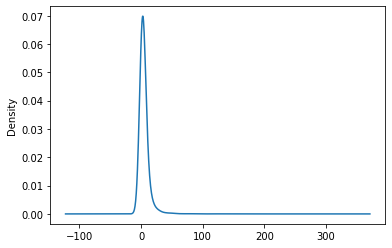

In [107]:
# Plot the data

s = df_invoice_by_customer.Count

ax = s.plot.kde(bw_method=.5)


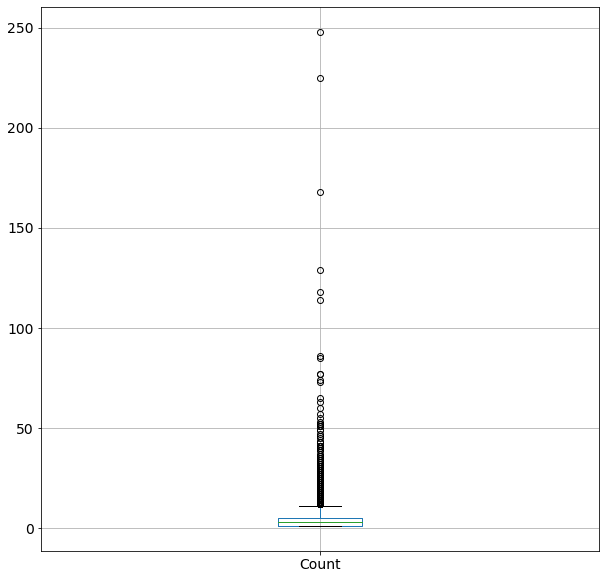

In [108]:
# Boxplot

df_invoice_by_customer.boxplot(column='Count',
                               grid=True,
                               figsize=(10,10),
                               fontsize=14,
                               return_type='axes'
                                      
                              )

In [109]:
# Add New column 'buying_freq'

df_invoice_by_customer['buying_freq'] = df_invoice_by_customer['Count'].apply(buying_freq)

df_invoice_by_customer = df_invoice_by_customer.reset_index()

df_invoice_by_customer.head()

,level_0,index,CustomerID,Count,buying_freq
0,0,1895,14911.0,248,high-freq
1,1,330,12748.0,225,high-freq
2,2,4042,17841.0,168,high-freq
3,3,1674,14606.0,129,high-freq
4,4,2192,15311.0,118,high-freq


### 2 Quantity Analysis

In [110]:
df_quantity_analysis = df.copy()

df_quantity_analysis = df_quantity_analysis[['CustomerID','StockCode','Quantity']]

# Aggregate by Customer

df_quantity_analysis = df_quantity_analysis\
                                        .groupby(by=['CustomerID','StockCode'])\
                                        .Quantity\
                                        .sum()\
                                        .sort_values(ascending=True)\
                                        .reset_index()
# Drop negative quantities as it is not relevant for analysis

df_quantity_analysis = df_quantity_analysis[(df_quantity_analysis.Quantity.sort_values()<5000) & (df_quantity_analysis.Quantity.sort_values()>0)]
                                            

df_quantity_analysis.head()







/Users/rajeshpillai/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app


,CustomerID,StockCode,Quantity
2395,16734.0,84674,1
2396,16719.0,22501,1
2397,15039.0,22682,1
2398,16719.0,22468,1
2399,13047.0,23118,1


We see that the outliers beyond 3000 are not required since those transactions have been cancelled out.
So we remove all quantities below 0

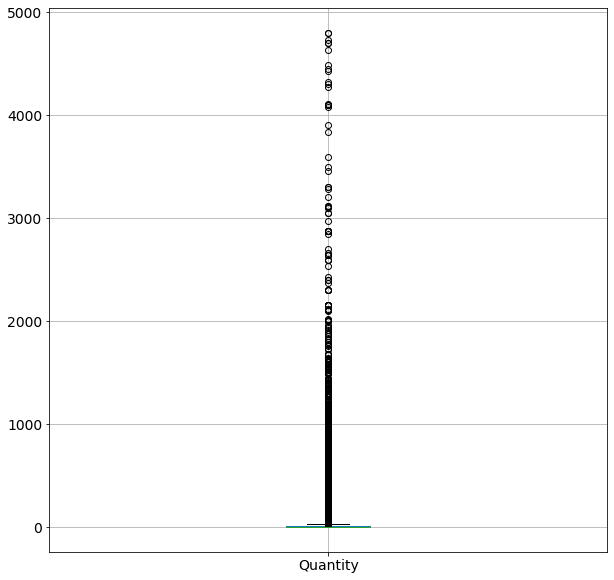

In [111]:
df_quantity_analysis.boxplot(column='Quantity',
                               grid=True,
                               figsize=(10,10),
                               fontsize=14,
                               return_type='axes'
                                      
                              )

In [112]:
#df_quantity_analysis.Quantity.plot.kde()

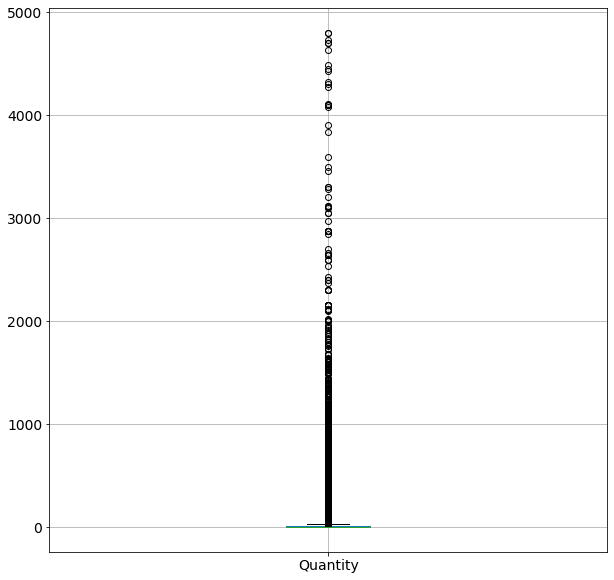

In [113]:
df_quantity_analysis.boxplot(column='Quantity',
                               grid=True,
                               figsize=(10,10),
                               fontsize=14,
                               return_type='axes'
                                      
                              )

In [114]:
df_quantity_analysis.Quantity.describe()

count    265207.000000
mean         18.205847
std          77.561413
min           1.000000
25%           2.000000
50%           6.000000
75%          12.000000
max        4801.000000
Name: Quantity, dtype: float64

In [115]:
qty_analysis = df_quantity_analysis.Quantity.describe().to_dict()

qty_analysis

{'count': 265207.0,
 'mean': 18.20584675366789,
 'std': 77.56141287317637,
 'min': 1.0,
 '25%': 2.0,
 '50%': 6.0,
 '75%': 12.0,
 'max': 4801.0}

In [116]:
qty_analysis['25%']

2.0

count     158.000000
mean       43.873418
std       250.201874
min         1.000000
25%         9.000000
50%        18.000000
75%        18.000000
max      3114.000000
Name: Quantity, dtype: float64

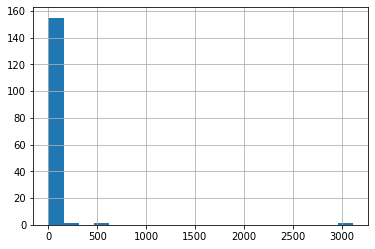

In [117]:
# Product wise quantity distribution

df_quantity_analysis[df_quantity_analysis.StockCode==21108].Quantity.hist(bins=20)


df_quantity_analysis[df_quantity_analysis.StockCode==21108].Quantity.describe()

In [119]:
# Add New column 'qty'


df_quantity_analysis['qty'] = df_quantity_analysis\
                                                  .apply(lambda df_quantity_analysis:qty_freq(df_quantity_analysis['Quantity'],\
                                                    qty_analysis), axis=1)

df_quantity_analysis = df_quantity_analysis.reset_index()

df_quantity_analysis.head()

,level_0,index,CustomerID,StockCode,Quantity,qty
0,0,2395,16734.0,84674,1,low
1,1,2396,16719.0,22501,1,low
2,2,2397,15039.0,22682,1,low
3,3,2398,16719.0,22468,1,low
4,4,2399,13047.0,23118,1,low


### Basket Analysis

#### a: High b: Mid c: Low

### Analysis

What we explore is to find Customers who buy expensive, mid range and low price items.
In the present analysis we do not have product categorisation, so we cannot compare within individual categories.


In [ ]:
def price_range(UnitPrice, qty_analysis):
    
    qty = Quantity
    
    qty_50 = qty_analysis['50%']
    qty_75 = qty_analysis['75%']
    
    if qty <qty_50:
        val = 'low'
    
    elif qty >qty_75:
        val = 'high'
    
    else :
        val ='medium'
    
    return val

In [120]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [123]:
df_price_analysis = df.copy()

df_price_analysis = df_price_analysis[['CustomerID','StockCode','UnitPrice']]

# Aggregate by Customer

df_price_analysis = df_price_analysis\
                                    .groupby(by=['CustomerID','StockCode'])\
                                    .UnitPrice\
                                    .sum()\
                                    .sort_values(ascending=True)\
                                    .reset_index()

# Drop negative or zero price as it is not relevant for analysis

df_price_analysis = df_price_analysis[(df_price_analysis.UnitPrice.sort_values()>1)]

# 
df_price_analysis.head()

/Users/rajeshpillai/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  app.launch_new_instance()


,CustomerID,StockCode,UnitPrice
55312,14298.0,21641,1.01
55313,12748.0,22049,1.03
55314,17920.0,22544,1.03
55315,14298.0,22610,1.03
55316,17920.0,22541,1.03


In [140]:
import matplotlib.pyplot as plt

prices = df_price_analysis.UnitPrice.sort_values().unique()

a = np.hstack((prices.normal(size=1000),
               prices.normal(loc=5, scale=2, size=1000)))

_ = plt.hist(a, bins=3)  # arguments are passed to np.histogram

plt.title("Histogram with 3 bins")

plt.show()


AttributeError: 'numpy.ndarray' object has no attribute 'normal'

In [144]:
prices = df_price_analysis.UnitPrice.round(0).astype('int').unique()

prices

array([    1,     2,     3,     4,     5,     6,     7,     8,     9,
          10,    11,    12,    13,    14,    15,    16,    17,    18,
          19,    20,    21,    22,    23,    24,    25,    26,    27,
          28,    29,    30,    31,    32,    33,    34,    35,    36,
          37,    38,    39,    40,    41,    42,    43,    44,    45,
          46,    47,    48,    49,    50,    51,    52,    53,    54,
          55,    56,    57,    58,    59,    60,    61,    62,    63,
          64,    65,    66,    67,    68,    69,    70,    71,    72,
          73,    74,    75,    76,    77,    78,    79,    80,    81,
          82,    83,    84,    85,    86,    87,    88,    89,    90,
          91,    92,    93,    94,    95,    96,    97,    98,    99,
         100,   101,   102,   103,   104,   105,   106,   107,   108,
         109,   110,   111,   112,   115,   116,   119,   120,   121,
         122,   124,   125,   126,   127,   128,   129,   130,   133,
         134,   135,

In [145]:
prices

AttributeError: 'numpy.ndarray' object has no attribute 'describe'